In [1]:
%matplotlib inline
import os 
import radical.analytics as ra
import radical.pilot as rp
import radical.utils as ru
import radical.entk as re
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
!radical-stack


  python               : 2.7.15
  pythonpath           : 
  virtualenv           : python2

  radical.analytics    : 0.70.0
  radical.entk         : 0.70.0
  radical.pilot        : 0.70.0
  radical.saga         : 0.70.0
  radical.utils        : 0.70.0



In [2]:
Design1CpuUtil = np.load('../Data/Design1CPUutil.npy')
Design1GpuUtil = np.load('../Data/Design1GPUutil.npy')

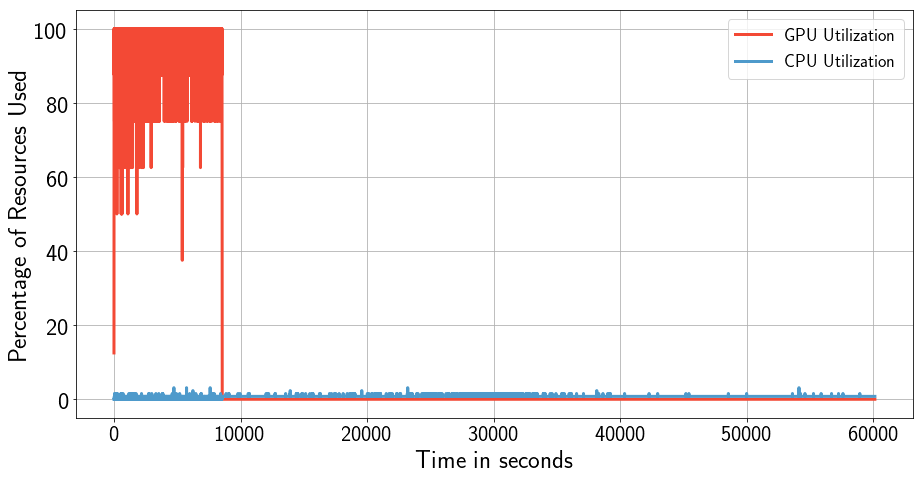

In [3]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5),sharex=True)

_ = axis.plot(((Design1GpuUtil[2:,0]-Design1GpuUtil[2,0])),(((Design1GpuUtil[2:,1])/8.0)/1)*100,marker='',linestyle='-',linewidth=3, label='GPU Utilization', color=reds(150))
_ = axis.plot(((Design1CpuUtil[:,0]-Design1CpuUtil[0,0])),(((Design1CpuUtil[:,1]-Design1GpuUtil[2:,1])/128.0)/1)*100,marker='',linestyle='-',linewidth=3, label='CPU Utilization', color=blues(150))
_ = axis.set_ylabel('Percentage of Resources Used',fontsize=25)
_ = axis.set_xlabel('Time in seconds',fontsize=25)
_ = axis.grid('on')
_ = axis.legend(fontsize=18)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=22)
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=24)
# fig.savefig('../Data/geo_Design1Utilization.pdf',dpi=800,bbox_inches='tight')

In [4]:
Design2CpuUtil = np.load('../Data/Des2CpuUtil.npy')
Design2GpuUtil = np.load('../Data/Des2GpuUtil.npy')

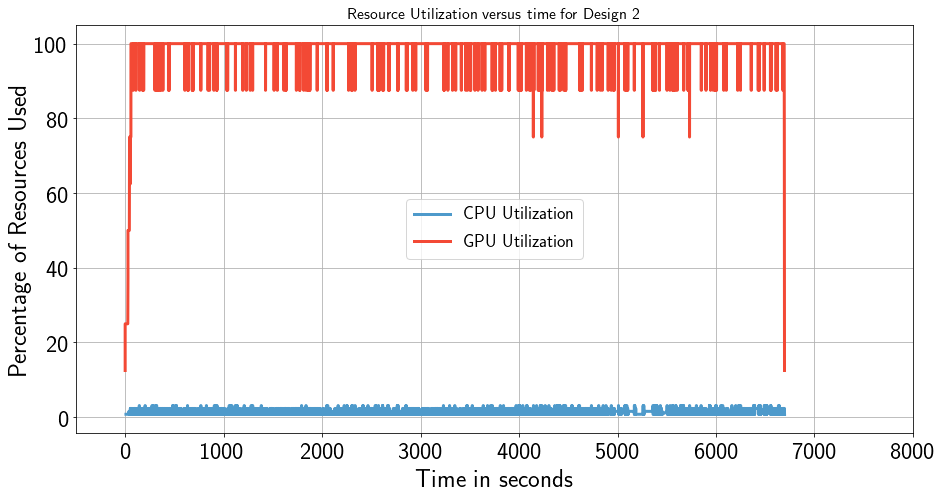

In [5]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5),sharex=True)
start_point = min(Design2CpuUtil[0,0], Design2GpuUtil[0,0])
_ = axis.plot((Design2CpuUtil[:,0]-start_point),((Design2CpuUtil[:,1])/128.0)*100,marker='',linestyle='-',linewidth=3, label='CPU Utilization', color=blues(150))
_ = axis.plot((Design2GpuUtil[:,0]-start_point),(Design2GpuUtil[:,1]/8.0)*100,marker='',linestyle='-',  linewidth=3, label='GPU Utilization', color=reds(150))
_ = axis.set_ylabel('Percentage of Resources Used',fontsize=25)
_ = axis.set_xlabel('Time in seconds',fontsize=25)
_ = axis.grid('on')

_ = axis.set_xlim([-500,8000])
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=24)
_ = axis.legend(fontsize=18)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=24)
_ = axis.set_title('Resource Utilization versus time for Design 2', fontsize=16)
#fig.savefig('../Data/geo_Design2Utilization.pdf',dpi=800,bbox_inches='tight')

In [6]:
Design2aCpuUtil = np.load('../Data/Des2aCpuUtil.npy')
Design2aGpuUtil = np.load('../Data/Des2aGpuUtil.npy')

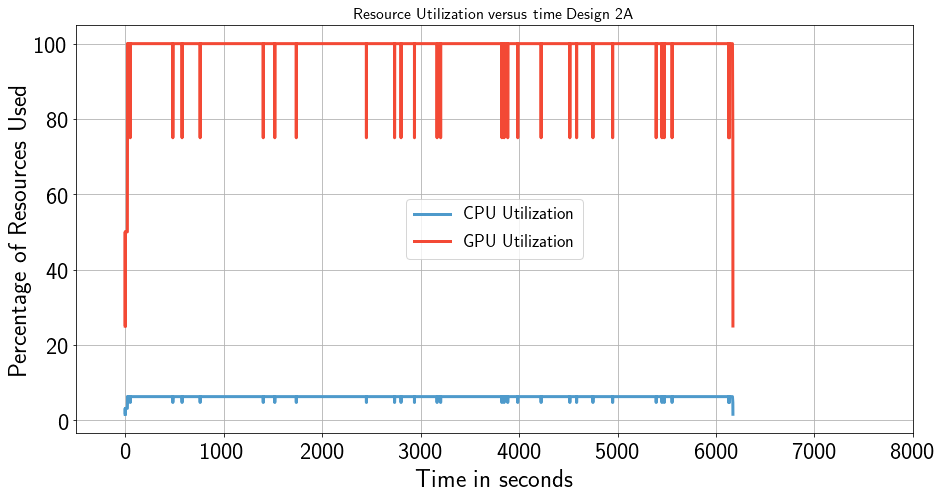

In [7]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5),sharex=True)
start_point = min(Design2aGpuUtil[0,0], Design2aGpuUtil[0,0])
_ = axis.plot((Design2aGpuUtil[:,0]-start_point),((Design2aGpuUtil[:,1])/128.0)*100,marker='',linestyle='-',linewidth=3, label='CPU Utilization', color=blues(150))
_ = axis.plot((Design2aGpuUtil[:,0]-start_point),(Design2aGpuUtil[:,1]/8.0)*100,marker='',linestyle='-',  linewidth=3, label='GPU Utilization', color=reds(150))
_ = axis.set_ylabel('Percentage of Resources Used',fontsize=25)
_ = axis.set_xlabel('Time in seconds',fontsize=25)
_ = axis.grid('on')
_ = axis.set_xlim([-500, 8000])
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=24)
_ = axis.legend(fontsize=18)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=24)

_ = axis.set_title('Resource Utilization versus time Design 2A', fontsize=16)
#fig.savefig('../Data/geo_Design2aUtilization.pdf',dpi=800,bbox_inches='tight')

In [8]:
print 'Design 1 utilization:', 'GPU mean ', ((((Design1GpuUtil[2:-18289,1])/8.0))*100).mean(), 'GPU STD ', ((((Design1GpuUtil[2:-18289,1])/8.0))*100).std()
print 'Design 1 utilization:', 'CPU mean ', (((Design1CpuUtil[:,1]-Design1GpuUtil[2:,1])/128.0)*100).mean(), 'CPU STD ', (((Design1CpuUtil[:,1]-Design1GpuUtil[2:,1])/128.0)*100).std()

Design 1 utilization: GPU mean  97.77655167073218 GPU STD  5.75517692140476
Design 1 utilization: CPU mean  0.4976227445824644 CPU STD  0.40768697376127117


In [9]:
print 'Design 2 utilization:', 'GPU mean ', ((((Design2GpuUtil[:,1])/8.0))*100).mean(), 'GPU STD ', ((((Design2GpuUtil[:,1])/8.0))*100).std()
print 'Design 2 utilization:', 'CPU mean ', (((Design2CpuUtil[:,1])/128.0)*100).mean(), 'CPU STD ', (((Design2CpuUtil[:,1])/128.0)*100).std()

Design 2 utilization: GPU mean  99.50528153051047 GPU STD  4.0734464004319175
Design 2 utilization: CPU mean  1.3509129340828725 CPU STD  0.6127251814021777


In [10]:
print 'Design 2A utilization:', 'GPU mean ', ((((Design2aGpuUtil[:,1])/8.0))*100).mean(), 'GPU STD ', ((((Design2aGpuUtil[:,1])/8.0))*100).std()
print 'Design 2A utilization:', 'CPU mean ', (((Design2aGpuUtil[:,1])/128.0)*100).mean(), 'CPU STD ', (((Design2aGpuUtil[:,1])/128.0)*100).std()

Design 2A utilization: GPU mean  99.69236337314513 GPU STD  3.57756252572473
Design 2A utilization: CPU mean  6.2307727108215705 CPU STD  0.22359765785779562
